In [1]:
import acquire
import prepare
import explore
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas import DataFrame
from acquire import acquire_telco_data
from prepare import train_validate_test_split
from prepare import prep_telco_data

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer



# Acquire

In [2]:
df = acquire_telco_data

In [3]:
df = acquire_telco_data(df)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [7]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [8]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

# Prepare

In [9]:
df = prep_telco_data(df)

In [10]:
df.head()


,customer_id,senior_citizen,tenure,monthly_charges,total_charges,internet_service_Fiber optic,internet_service_No,gender_Male,payment_method_Credit card (automatic),payment_method_Electronic check,...,device_protection_No internet service,device_protection_Yes,Churn_Yes,tech_support_No internet service,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,53.85,108.15,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


# Explore

In [11]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'Churn_Yes',
                                                  seed=123)

In [12]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,internet_service_Fiber optic,internet_service_No,gender_Male,payment_method_Credit card (automatic),payment_method_Electronic check,...,device_protection_No internet service,device_protection_Yes,Churn_Yes,tech_support_No internet service,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_Yes
5262,4560-WQAQW,0,59,68.70,4070.95,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3734,7134-HBPBS,1,72,108.10,7774.05,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,1
4340,4468-YDOVK,0,5,48.65,235.20,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2605,1790-NESIO,0,13,20.40,261.30,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1
2945,3987-KQDDU,0,9,75.60,661.55,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train = train.drop(columns=['Churn_Yes'])
y_train = train.Churn_Yes

X_validate = validate.drop(columns=['Churn_Yes'])
y_validate = validate.Churn_Yes

X_test = test.drop(columns=['Churn_Yes'])
y_test = test.Churn_Yes

In [14]:
df.Churn_Yes.value_counts() # (We will use 'No')

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [15]:
baseline_accuracy = (train.Churn_Yes== 0).mean()
round(baseline_accuracy, 3)

0.735

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   senior_citizen                          7043 non-null   int64  
 2   tenure                                  7043 non-null   int64  
 3   monthly_charges                         7043 non-null   float64
 4   total_charges                           7032 non-null   float64
 5   internet_service_Fiber optic            7043 non-null   uint8  
 6   internet_service_No                     7043 non-null   uint8  
 7   gender_Male                             7043 non-null   uint8  
 8   payment_method_Credit card (automatic)  7043 non-null   uint8  
 9   payment_method_Electronic check         7043 non-null   uint8  
 10  payment_method_Mailed check             7043 non-null   uint

# Univariate Stats (value count)

In [17]:
cat_vars = ['Churn_Yes','senior_citizen','partner_Yes','dependents_Yes','phone_service_Yes',
            'multiple_lines_Yes','online_security_Yes',
            'streaming_tv_Yes','streaming_movies_Yes',
            'paperless_billing_Yes','online_backup_Yes','device_protection_Yes',
            'tech_support_Yes','internet_service_Fiber optic',
            'internet_service_No','gender_Male','payment_method_Credit card (automatic)',
            'payment_method_Electronic check','payment_method_Mailed check','contract_One year',
            'contract_Two year']

quant_vars = ['monthly_charges','total_charges','tenure']

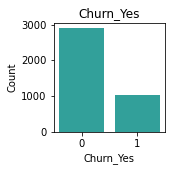

   Churn_Yes  Count  Percent
0          0   2897    73.47
1          1   1046    26.53
_________________________________________________________________


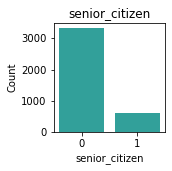

   senior_citizen  Count  Percent
0               0   3322    84.25
1               1    621    15.75
_________________________________________________________________


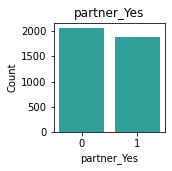

   partner_Yes  Count  Percent
0            0   2056    52.14
1            1   1887    47.86
_________________________________________________________________


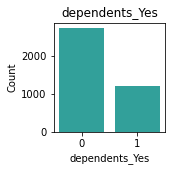

   dependents_Yes  Count  Percent
0               0   2736    69.39
1               1   1207    30.61
_________________________________________________________________


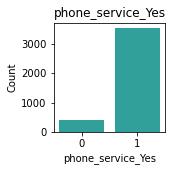

   phone_service_Yes  Count  Percent
1                  1   3544    89.88
0                  0    399    10.12
_________________________________________________________________


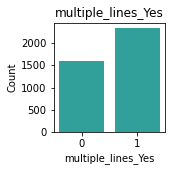

   multiple_lines_Yes  Count  Percent
0                   1   2337    59.27
1                   0   1606    40.73
_________________________________________________________________


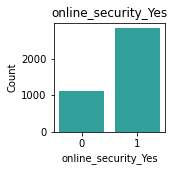

   online_security_Yes  Count  Percent
0                    1   2830    71.77
1                    0   1113    28.23
_________________________________________________________________


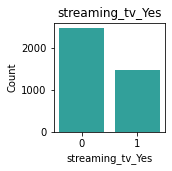

   streaming_tv_Yes  Count  Percent
0                 0   2464    62.49
1                 1   1479    37.51
_________________________________________________________________


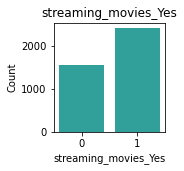

   streaming_movies_Yes  Count  Percent
0                     1   2400    60.87
1                     0   1543    39.13
_________________________________________________________________


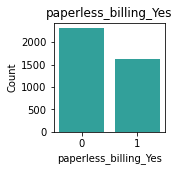

   paperless_billing_Yes  Count  Percent
1                      0   2311    58.61
0                      1   1632    41.39
_________________________________________________________________


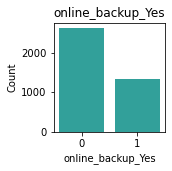

   online_backup_Yes  Count  Percent
0                  0   2610    66.19
1                  1   1333    33.81
_________________________________________________________________


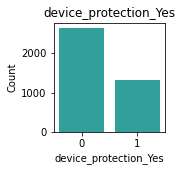

   device_protection_Yes  Count  Percent
0                      0   2630     66.7
1                      1   1313     33.3
_________________________________________________________________


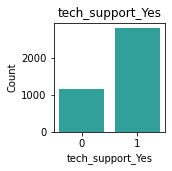

   tech_support_Yes  Count  Percent
0                 1   2788    70.71
1                 0   1155    29.29
_________________________________________________________________


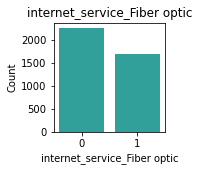

   internet_service_Fiber optic  Count  Percent
0                             0   2245    56.94
1                             1   1698    43.06
_________________________________________________________________


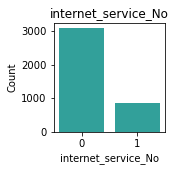

   internet_service_No  Count  Percent
0                    0   3081    78.14
1                    1    862    21.86
_________________________________________________________________


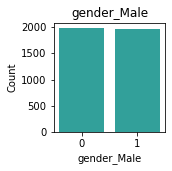

   gender_Male  Count  Percent
1            0   1978    50.16
0            1   1965    49.84
_________________________________________________________________


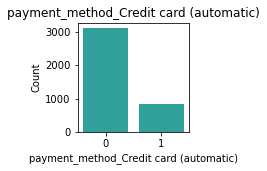

   payment_method_Credit card (automatic)  Count  Percent
0                                       0   3117    79.05
1                                       1    826    20.95
_________________________________________________________________


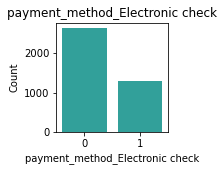

   payment_method_Electronic check  Count  Percent
0                                0   2636    66.85
1                                1   1307    33.15
_________________________________________________________________


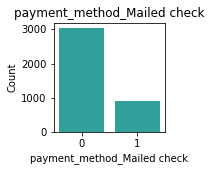

   payment_method_Mailed check  Count  Percent
0                            0   3030    76.85
1                            1    913    23.15
_________________________________________________________________


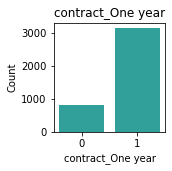

   contract_One year  Count  Percent
0                  1   3126    79.28
1                  0    817    20.72
_________________________________________________________________


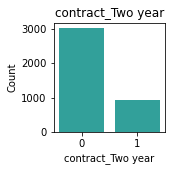

   contract_Two year  Count  Percent
0                  0   3017    76.52
1                  1    926    23.48
_________________________________________________________________


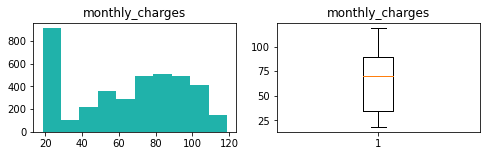

count    3943.000000
mean       64.176477
std        29.980195
min        18.550000
25%        35.075000
50%        69.900000
75%        89.650000
max       118.750000
Name: monthly_charges, dtype: float64


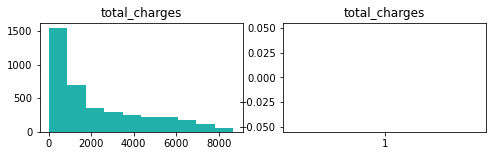

count    3935.000000
mean     2231.124498
std      2232.969340
min        18.800000
25%       394.000000
50%      1359.700000
75%      3652.900000
max      8672.450000
Name: total_charges, dtype: float64


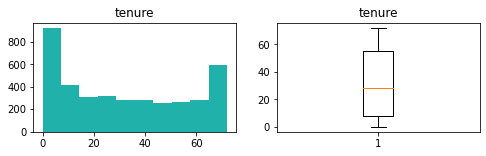

count    3943.00000
mean       32.01471
std        24.47187
min         0.00000
25%         8.00000
50%        28.00000
75%        55.00000
max        72.00000
Name: tenure, dtype: float64


In [18]:
explore.explore_univariate(train, cat_vars, quant_vars)

# Bivariate Stats (use target var. Chruned)

In [19]:
print(cat_vars)
print('---------')
print(quant_vars)

['Churn_Yes', 'senior_citizen', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes', 'multiple_lines_Yes', 'online_security_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes', 'paperless_billing_Yes', 'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes', 'internet_service_Fiber optic', 'internet_service_No', 'gender_Male', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'payment_method_Mailed check', 'contract_One year', 'contract_Two year']
---------
['monthly_charges', 'total_charges', 'tenure']


In [20]:
cat_vars = cat_vars[1:]

senior_citizen 
_____________________

         chi2       p-value  degrees of freedom
0  103.553624  2.534407e-24                   1

observed:
 Churn_Yes          0     1   All
senior_citizen                  
0               2544   778  3322
1                353   268   621
All             2897  1046  3943

expected:
              0           1
0  2440.739031  881.260969
1   456.260969  164.739031


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


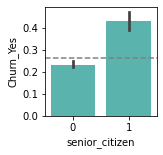


_____________________

partner_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  97.989047  4.207032e-23                   1

observed:
 Churn_Yes       0     1   All
partner_Yes                  
0            1373   683  2056
1            1524   363  1887
All          2897  1046  3943

expected:
              0           1
0  1510.583819  545.416181
1  1386.416181  500.583819


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


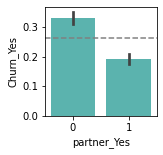


_____________________

dependents_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  119.543965  7.961121e-28                   1

observed:
 Churn_Yes          0     1   All
dependents_Yes                  
0               1870   866  2736
1               1027   180  1207
All             2897  1046  3943

expected:
              0           1
0  2010.193254  725.806746
1   886.806746  320.193254


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


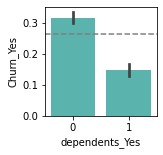


_____________________

phone_service_Yes 
_____________________

       chi2   p-value  degrees of freedom
0  0.996725  0.318104                   1

observed:
 Churn_Yes             0     1   All
phone_service_Yes                  
0                   302    97   399
1                  2595   949  3544
All                2897  1046  3943

expected:
              0           1
0   293.153183  105.846817
1  2603.846817  940.153183


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


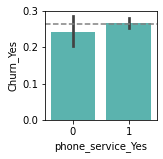


_____________________

multiple_lines_Yes 
_____________________

       chi2   p-value  degrees of freedom
0  9.265162  0.002336                   1

observed:
 Churn_Yes              0     1   All
multiple_lines_Yes                  
0                   1759   578  2337
1                   1138   468  1606
All                 2897  1046  3943

expected:
              0           1
0  1717.040071  619.959929
1  1179.959929  426.040071


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


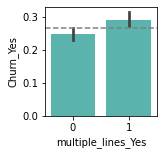


_____________________

online_security_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  118.370218  1.438660e-27                   1

observed:
 Churn_Yes               0     1   All
online_security_Yes                  
0                    1943   887  2830
1                     954   159  1113
All                  2897  1046  3943

expected:
              0           1
0  2079.256911  750.743089
1   817.743089  295.256911


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


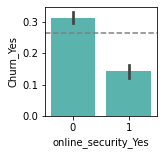


_____________________

streaming_tv_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  16.277831  0.000055                   1

observed:
 Churn_Yes            0     1   All
streaming_tv_Yes                  
0                 1865   599  2464
1                 1032   447  1479
All               2897  1046  3943

expected:
             0          1
0  1810.34948  653.65052
1  1086.65052  392.34948


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


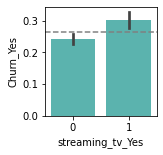


_____________________

streaming_movies_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  20.442624  0.000006                   1

observed:
 Churn_Yes                0     1   All
streaming_movies_Yes                  
0                     1825   575  2400
1                     1072   471  1543
All                   2897  1046  3943

expected:
              0           1
0  1763.327416  636.672584
1  1133.672584  409.327416


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


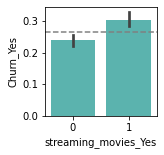


_____________________

paperless_billing_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  124.641559  6.097065e-29                   1

observed:
 Churn_Yes                 0     1   All
paperless_billing_Yes                  
0                      1352   280  1632
1                      1545   766  2311
All                    2897  1046  3943

expected:
              0           1
0  1199.062643  432.937357
1  1697.937357  613.062643


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


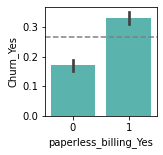


_____________________

online_backup_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  24.656937  6.849773e-07                   1

observed:
 Churn_Yes             0     1   All
online_backup_Yes                  
0                  1852   758  2610
1                  1045   288  1333
All                2897  1046  3943

expected:
              0           1
0  1917.618565  692.381435
1   979.381435  353.618565


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


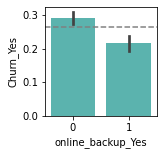


_____________________

device_protection_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  21.665662  0.000003                   1

observed:
 Churn_Yes                 0     1   All
device_protection_Yes                  
0                      1871   759  2630
1                      1026   287  1313
All                    2897  1046  3943

expected:
             0          1
0  1932.31296  697.68704
1   964.68704  348.31296


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


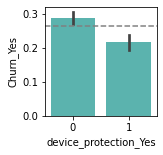


_____________________

tech_support_Yes 
_____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2       p-value  degrees of freedom
0  93.351954  4.377492e-22                   1

observed:
 Churn_Yes            0     1   All
tech_support_Yes                  
0                 1926   862  2788
1                  971   184  1155
All               2897  1046  3943

expected:
              0           1
0  2048.398681  739.601319
1   848.601319  306.398681


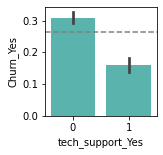


_____________________

internet_service_Fiber optic 
_____________________

         chi2       p-value  degrees of freedom
0  395.679611  4.802215e-88                   1

observed:
 Churn_Yes                        0     1   All
internet_service_Fiber optic                  
0                             1923   322  2245
1                              974   724  1698
All                           2897  1046  3943

expected:
              0           1
0  1649.445853  595.554147
1  1247.554147  450.445853


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


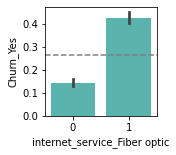


_____________________

internet_service_No 
_____________________

         chi2       p-value  degrees of freedom
0  207.812554  4.122077e-47                   1

observed:
 Churn_Yes               0     1   All
internet_service_No                  
0                    2098   983  3081
1                     799    63   862
All                  2897  1046  3943

expected:
             0          1
0  2263.67157  817.32843
1   633.32843  228.67157


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


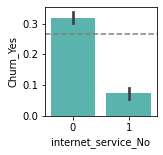


_____________________

gender_Male 
_____________________

       chi2  p-value  degrees of freedom
0  0.910245  0.34005                   1

observed:
 Churn_Yes       0     1   All
gender_Male                  
0            1430   535  1965
1            1467   511  1978
All          2897  1046  3943

expected:
              0           1
0  1443.724322  521.275678
1  1453.275678  524.724322


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


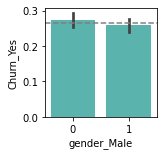


_____________________

payment_method_Credit card (automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  65.959586  4.602645e-16                   1

observed:
 Churn_Yes                                  0     1   All
payment_method_Credit card (automatic)                  
0                                       2198   919  3117
1                                        699   127   826
All                                     2897  1046  3943

expected:
              0           1
0  2290.121481  826.878519
1   606.878519  219.121481


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


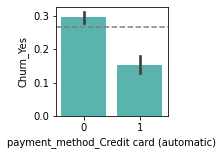


_____________________

payment_method_Electronic check 
_____________________

         chi2       p-value  degrees of freedom
0  357.597586  9.390904e-80                   1

observed:
 Churn_Yes                           0     1   All
payment_method_Electronic check                  
0                                2184   452  2636
1                                 713   594  1307
All                              2897  1046  3943

expected:
              0           1
0  1936.721278  699.278722
1   960.278722  346.721278


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


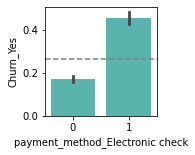


_____________________

payment_method_Mailed check 
_____________________

        chi2       p-value  degrees of freedom
0  33.517772  7.061579e-09                   1

observed:
 Churn_Yes                       0     1   All
payment_method_Mailed check                  
0                            2158   872  3030
1                             739   174   913
All                          2897  1046  3943

expected:
              0           1
0  2226.200862  803.799138
1   670.799138  242.200862


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


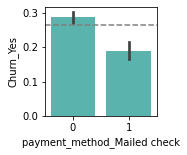


_____________________

contract_One year 
_____________________

         chi2       p-value  degrees of freedom
0  144.864058  2.299754e-33                   1

observed:
 Churn_Yes             0     1   All
contract_One year                  
0                  2161   965  3126
1                   736    81   817
All                2897  1046  3943

expected:
              0           1
0  2296.733959  829.266041
1   600.266041  216.733959


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


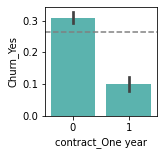


_____________________

contract_Two year 
_____________________

         chi2       p-value  degrees of freedom
0  344.605592  6.336861e-77                   1

observed:
 Churn_Yes             0     1   All
contract_Two year                  
0                  1998  1019  3017
1                   899    27   926
All                2897  1046  3943

expected:
              0           1
0  2216.649505  800.350495
1   680.350495  245.649505


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


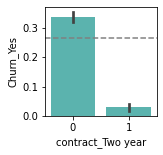


_____________________

monthly_charges 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


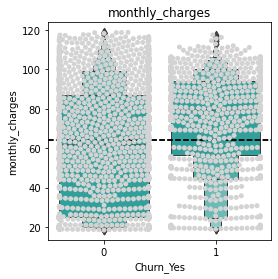

            count       mean        std    min      25%     50%     75%  \
Churn_Yes                                                                 
0          2897.0  60.528115  30.920970  18.55  25.0500  61.450  87.100   
1          1046.0  74.280975  24.531496  18.95  56.8125  79.375  94.175   

              max  
Churn_Yes          
0          118.75  
1          117.45   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1128901.5, pvalue=1.935777612363077e-34)

____________________

total_charges 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


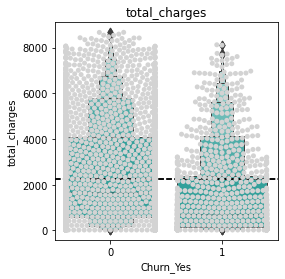

            count         mean          std   min     25%       50%  \
Churn_Yes                                                             
0          2889.0  2484.207892  2289.941185  18.8  567.80  1623.400   
1          1046.0  1532.120746  1900.695751  19.1  131.05   673.175   

                 75%      max  
Churn_Yes                      
0          4089.4500  8672.45  
1          2364.3875  8127.60   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1963184.0, pvalue=9.497845548651707e-46)

____________________

tenure 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


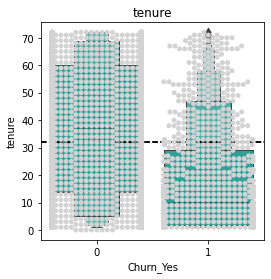

            count       mean        std  min   25%   50%   75%   max
Churn_Yes                                                           
0          2897.0  37.076976  24.066435  0.0  14.0  37.0  60.0  72.0
1          1046.0  17.994264  19.651411  1.0   2.0  10.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2226616.0, pvalue=1.1459601228825663e-112)

____________________



In [21]:
explore.explore_bivariate(train, 'Churn_Yes', cat_vars, quant_vars)

# Multivariate Stats & Analysis

In [42]:
cat_vars = ['internet_service_Fiber optic','senior_citizen','tech_support_Yes']

quant_vars = ['monthly_charges']

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: Us

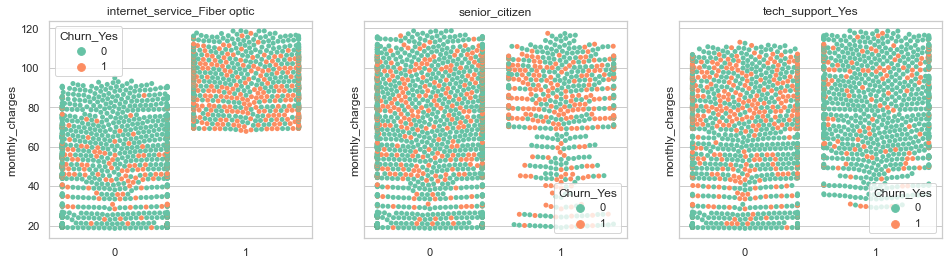

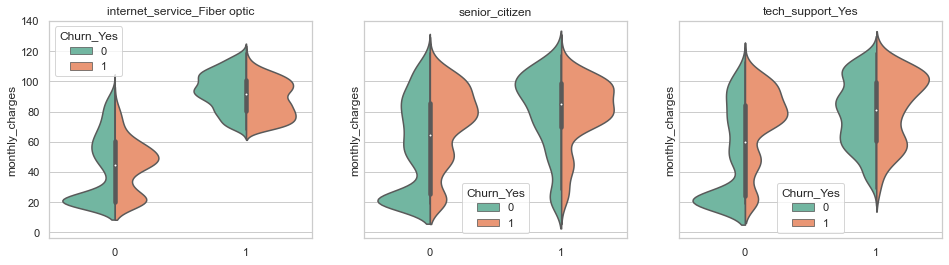

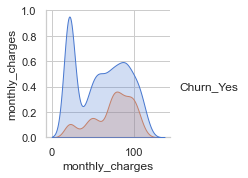

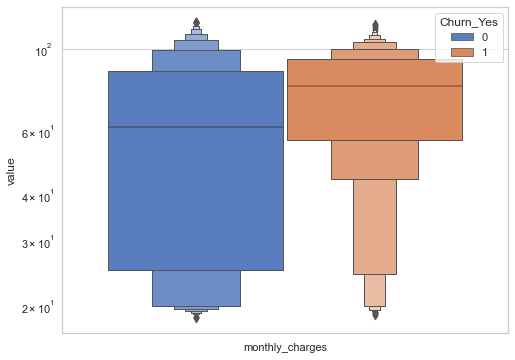

In [43]:
target = 'Churn_Yes'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [44]:
cat_vars = ['senior_citizen','tech_support_Yes']

quant_vars = ['monthly_charges']

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


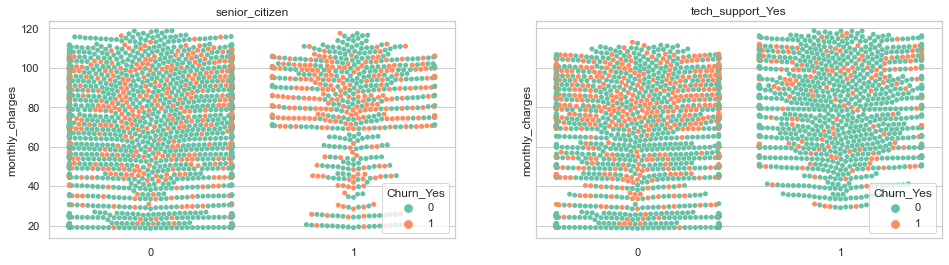

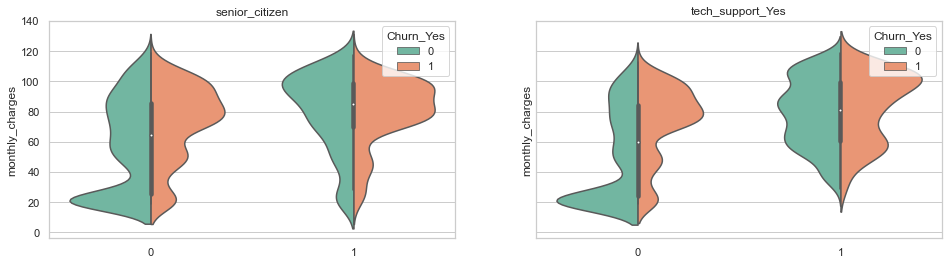

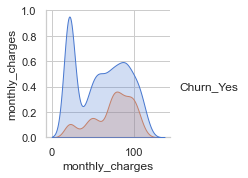

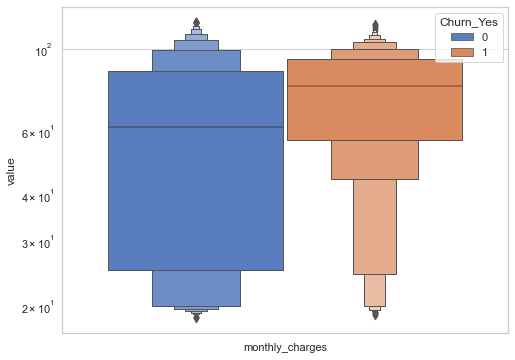

In [45]:
target = 'Churn_Yes'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [16]:
# 1) Create a model that includes FiberOptic and Monthly Charges. Does this model perform 
# better than your baseline?

In [58]:
# Same as baseline accuracy?
logit = LogisticRegression(random_state = 123)

features = ['senior_citizen','partner_Yes','dependents_Yes','phone_service_Yes',
            'multiple_lines_Yes','online_security_Yes',
            'streaming_tv_Yes','streaming_movies_Yes',
            'paperless_billing_Yes','online_backup_Yes','device_protection_Yes',
            'tech_support_Yes','internet_service_Fiber optic',
            'internet_service_No','gender_Male','payment_method_Credit card (automatic)',
            'payment_method_Electronic check','payment_method_Mailed check','contract_One year',
            'contract_Two year']

logit.fit(X_train[features], y_train)

y_pred = logit.predict(X_train[features])

accuracy = logit.score(X_train[features], y_train)
accuracy

0.7945726604108547

In [59]:
# Validate
y_pred_validate = logit.predict(X_validate[features])

print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1242
           1       0.60      0.52      0.56       449

    accuracy                           0.78      1691
   macro avg       0.72      0.70      0.71      1691
weighted avg       0.77      0.78      0.78      1691

